In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
gold_data = pd.read_csv('gld_price_data.csv')

In [8]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold_data.shape

(2290, 6)

In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
correlation = gold_data.corr()

ValueError: could not convert string to float: '1/2/2008'

<AxesSubplot:>

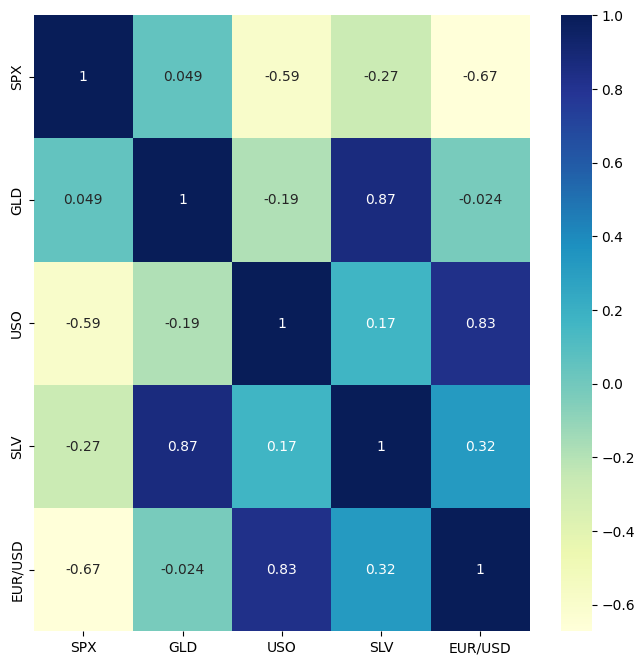

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\users\santosh\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

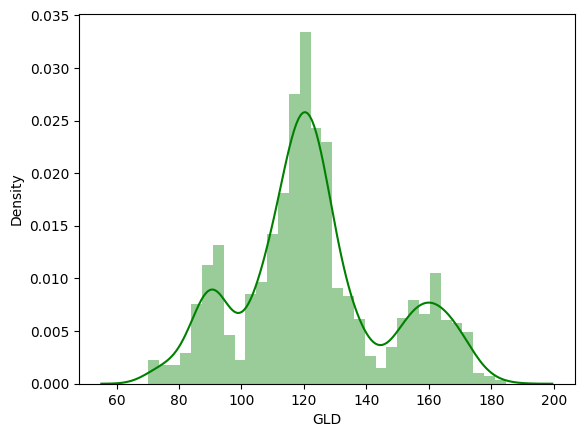

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.69679918  82.03729979 115.87110016 127.69350092 120.91600108
 154.76569728 150.25479854 126.17970037 117.4736988  126.08920038
 116.69020082 171.22260114 141.51869834 167.60279802 115.09720022
 118.11170059 139.32210297 170.14790094 159.46230346 158.83629903
 155.03569998 124.97469999 176.17059974 156.89930361 125.20260062
  93.98869967  77.84599988 120.83310012 119.10849949 167.46309966
  88.19520041 125.4707006   91.17360097 117.94239957 121.03689905
 136.47360066 115.32940117 114.93100103 147.30239959 107.21050083
 104.20340236  87.10759768 126.49420009 118.12540014 153.10129904
 119.62430013 108.4086997  107.85649767  93.23620072 127.06969787
  75.16940045 113.71309918 121.0855     111.05599893 118.88959903
 120.66629977 158.94739939 168.14100097 146.86249584  85.88909838
  94.16310049  86.81209897  90.59340027 118.97480061 126.4573004
 127.45610016 168.81100028 122.40159914 117.37329871  98.67760024
 167.9640015  142.81489764 132.16770276 120.9681022  121.09449923
 119.665400

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print("R squared error : ", error_score)

R squared error :  0.9891439569115674


In [ ]:
Y_test = list(Y_test)

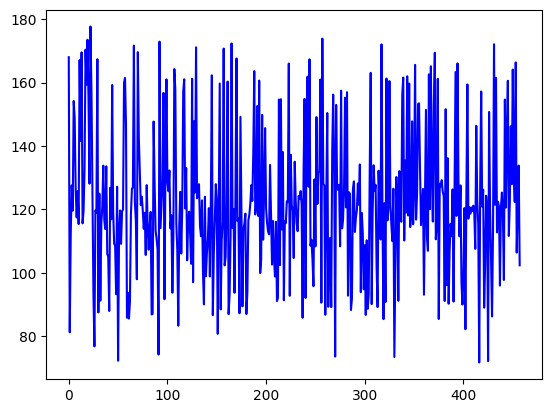

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value') 

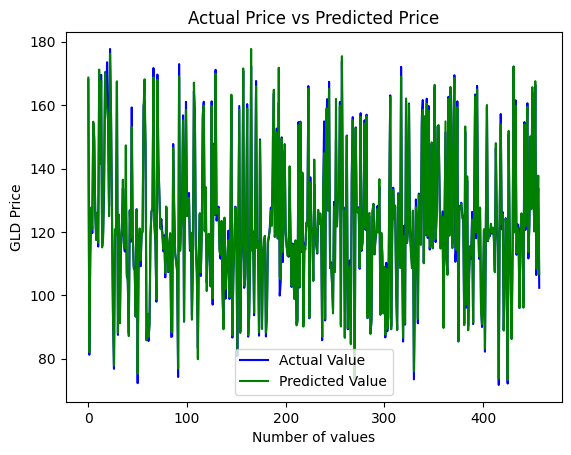

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value') 
plt.plot(test_data_prediction, color='green', label='Predicted Value') 
plt.title('Actual Price vs Predicted Price') 
plt.xlabel('Number of values') 
plt.ylabel('GLD Price') 
plt.legend() 
plt.show() 

In [ ]:
input_data = (1447.160034, 78.470001, 15.1800, 1.471692) 
input_data_as_numpy_array = np.asarray(input_data) 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = regressor.predict(input_data_reshaped)[0] 

c:\Users\MAGESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
prediction

84.90910015999998

In [ ]:
regressor

RandomForestRegressor()

In [ ]:
import pickle

In [ ]:
pickle.dump(regressor, open("gold_price_predictor.pkl","wb"))

In [ ]:
file_path = 'data.pkl'
data = regressor
# Open file in binary write mode
with open(file_path, 'wb') as f:
    # Dump data into the file
    pickle.dump(data, f)

In [ ]:
import pickle
with open('data.pkl','rb') as f:
    regressor = pickle.load(f)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv('gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Split data into features (X) and target variable (y)
X = df.drop(columns=['GLD'])  # Assuming there are other features besides 'Value'
y = df['GLD']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Training Set Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R^2:", r2_train)

print("\nTest Set Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R^2:", r2_test)

# Make predictions
predictions = rf_model.predict(X_test)  # Predicting on the test set


Training Set Metrics:
MAE: 0.4570191182435695
MSE: 0.7206726845256229
RMSE: 0.8489244280415207
R^2: 0.9986939524140419

Test Set Metrics:
MAE: 1.16439165812227
MSE: 3.906492189631412
RMSE: 1.9764848063244533
R^2: 0.9912125368958515


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('gld_price_data.csv')

# Preprocess the data if needed (convert date column to datetime, handle missing values, etc.)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the year as a new feature
df['DayOfYear'] = df['Date'].dt.dayofyear

# Split data into features (X) and target variable (y)
X = df[['DayOfYear']]
y = df['GLD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=500)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# # Calculate evaluation metrics
# mae_train = mean_absolute_error(y_train, y_pred_train)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# mse_train = mean_squared_error(y_train, y_pred_train)
# mse_test = mean_squared_error(y_test, y_pred_test)
# rmse_train = np.sqrt(mse_train)
# rmse_test = np.sqrt(mse_test)
# r2_train = r2_score(y_train, y_pred_train)
# r2_test = r2_score(y_test, y_pred_test)

# # Print evaluation metrics
# print("Training Set Metrics:")
# print("MAE:", mae_train)
# print("MSE:", mse_train)
# print("RMSE:", rmse_train)
# print("R^2:", r2_train)

# print("\nTest Set Metrics:")
# print("MAE:", mae_test)
# print("MSE:", mse_test)
# print("RMSE:", rmse_test)
# print("R^2:", r2_test)

# Accept user input for the date
year = int(input("Enter the year (YYYY): "))
month = int(input("Enter the month (MM): "))
day = int(input("Enter the day (DD): "))

# Calculate the day of the year
date = pd.Timestamp(year=year, month=month, day=day)
day_of_year = date.dayofyear

# Predict the gold price for the input date
predicted_price = rf_model.predict([[day_of_year]])
print("Predicted Gold Price for {}-{}-{}: {}".format(year, month, day, predicted_price[0]))


Predicted Gold Price for 2024-4-3: 130.2032380382283


c:\Users\sharidoss\Downloads\Final\gold\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [16]:
import pickle
# Example data to pickle
data = rf_model
# Path to the pickle file
pickle_file_path = 'model.pkl'
# Open the file in binary write mode
with open(pickle_file_path, 'wb') as file:
    # Pickle the data and write it to the file
    pickle.dump(data, file)


In [ ]:
# Path to the pickle file
pickle_file_path = 'model.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    # Unpickle the data
    loaded_data = pickle.load(file)

print(loaded_data)  # Output: {'name': 'John', 'age': 30, 'city': 'New York'}


RandomForestRegressor(random_state=500)


[*********************100%%**********************]  1 of 1 completed


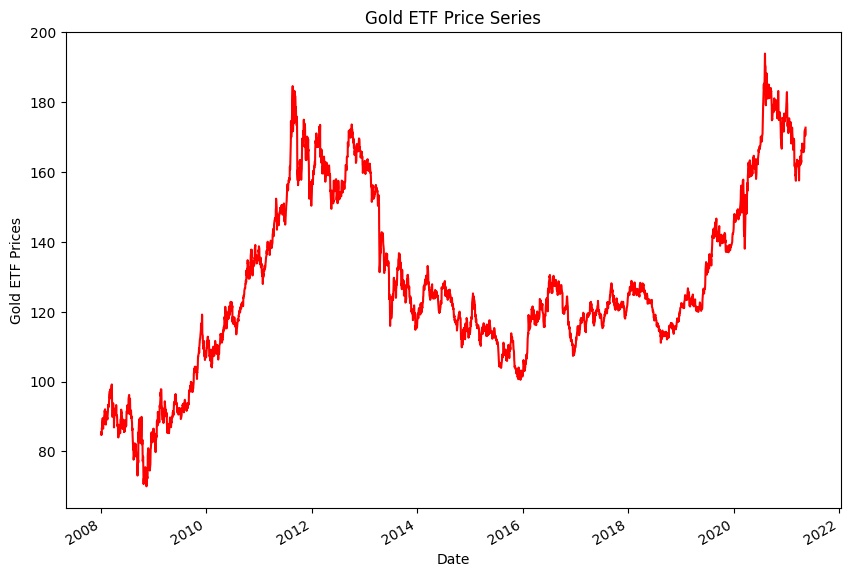

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.43 (constant)


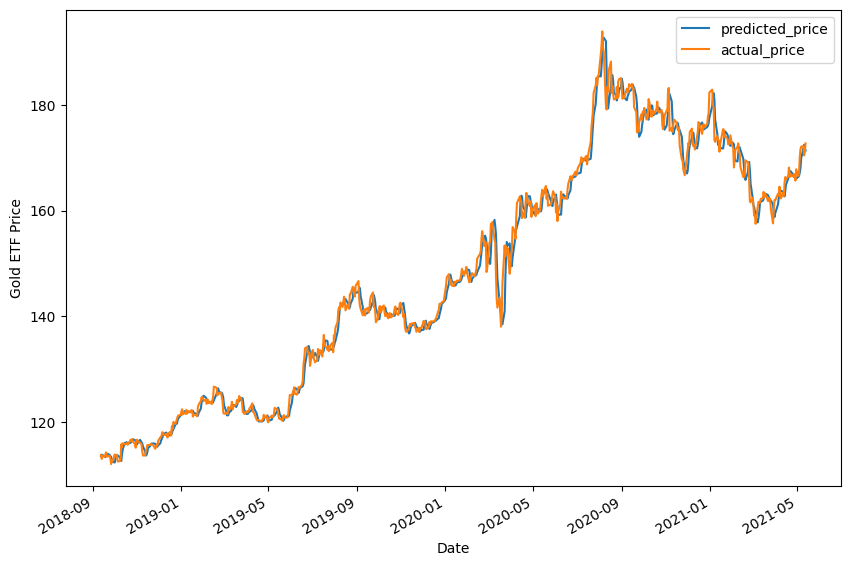

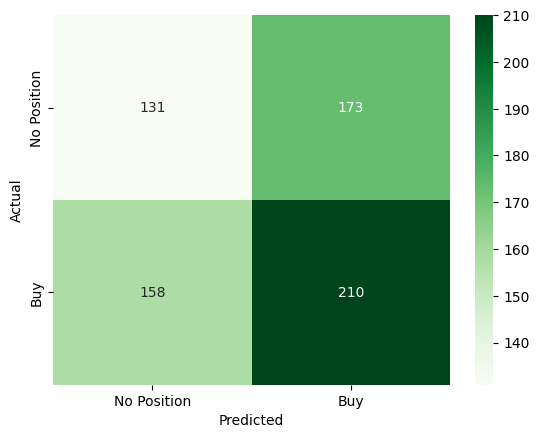

              precision    recall  f1-score   support

 No Position       0.45      0.43      0.44       304
         Buy       0.55      0.57      0.56       368

    accuracy                           0.51       672
   macro avg       0.50      0.50      0.50       672
weighted avg       0.51      0.51      0.51       672



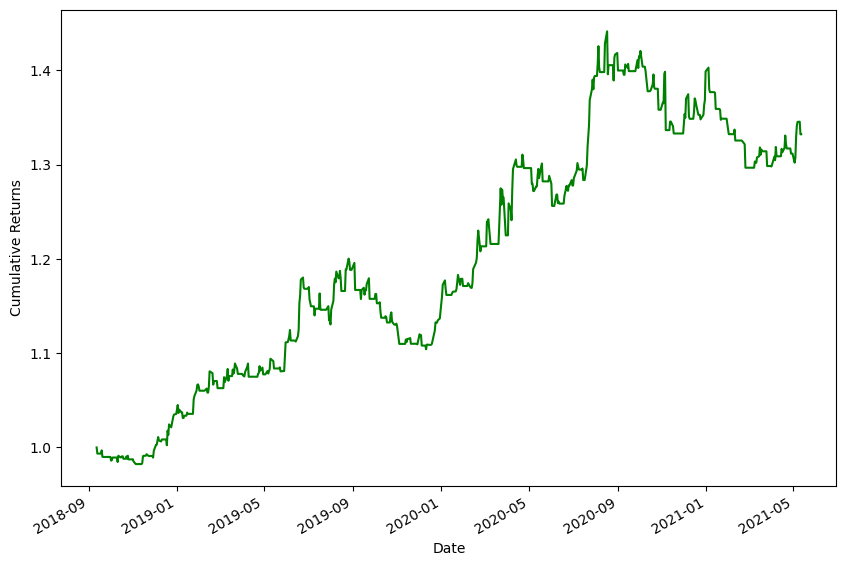

[*********************100%%**********************]  1 of 1 completed


Date,2024-04-01
signal,Buy
predicted_gold_price,205.764827


In [ ]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-darkgrid')

# yfinance is used to fetch data
import yfinance as yf

import warnings
warnings.simplefilter("ignore")

# Read data
Df = yf.download('GLD', '2008-01-01', '2021-5-17', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold.head()

gold['actual_price_next_day'] = gold.price.shift(-1)
gold['actual_signal'] = np.where(gold.actual_price_next_day.shift(1) < gold.actual_price_next_day,1,0)
gold.tail()

from sklearn.metrics import confusion_matrix
array = confusion_matrix(gold['actual_signal'], gold['signal'])
df = pd.DataFrame(array, index = ['No Position','Buy'], columns = ['No Position','Buy'])

# Plot the heatmap
import seaborn as sns
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(gold['actual_signal'], gold['signal'], target_names=['No Position','Buy']))

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

'Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5))

import datetime as dt
current_date = dt.datetime.now()
data = yf.download('GLD', '2008-06-01', current_date, auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data.tail(1)[['signal','predicted_gold_price']].T